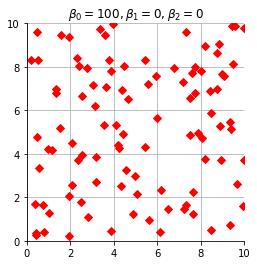

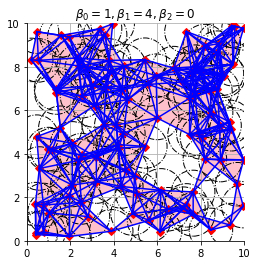

In [3]:
import numpy as np
import matplotlib.pyplot as p
import string
import galois
from matplotlib.patches import Polygon
from math import comb
np.set_printoptions(threshold=np.inf)


        
            
# Input points
#S = np.array([[0,0],
    #[-1,-3],
    #[2,-2],
    #[2,0],
    #[1,3],
    #[5,1]])
S= 10*np.random.rand(100,2)

# Distance matrix for the given coordinates of points 
R = np.zeros((len(S),len(S)))

for i in range(len(S)):
    for j in range(len(S)):
        R[i][j]=1/2*np.linalg.norm(S[i]-S[j])

#Sort the R matrix in increasing order (induces filtration)
#UNr = sorted(list(set(i for j in R for i in j)))


UNr=range(2)

# The big loop for varying radii              
for r in UNr:
    
    #Preliminary definitions
    H_0=len(S)
    H_1=0
    H_2=0
    
    #print(S)
    #alphabet_string = string.ascii_lowercase
    
    #Alphabet = list(alphabet_string)
    
    #SV=[Alphabet[i] for i in range(len(S))]
    
    
    figure, axes = p.subplots(1)
    p.grid()
    ax = p.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    p.xlim([0, 10])
    p.ylim([0,10])
    
    #Plot points in S, with balls of radius r
    for i in range(len(S)):
        
        circles = p.Circle( (S[i][0],S[i][1]), r ,fill = False, linestyle ='-.' )
        axes.add_artist(circles)
        p.plot(S[i][0],S[i][1],'rD')
        axes.set_aspect( 1 )
        #p.annotate(SV[i], (S[i][0],S[i][1]))
    
    #Basis for 1-chains
    C1=[]
        
    for i in range(len(S)):
        for j in range (i+1,len(S)):
            if np.linalg.norm(S[i]-S[j])<=2*r: #distance requirement
                C1=np.append(C1, [np.concatenate([S[i],S[j]])]);
                p.plot([S[i][0],S[j][0]],[S[i][1],S[j][1]],'-b')
    del_1=[]
    
    #Boundary Matrix
    if not(len(C1)==0):            
        C1=np.split(C1,len(C1)/4)
        del_1=np.zeros((len(S),len(C1)));
        for i in range(len(S)):
            for j in range(len(C1)):
                if all(S[i]== C1[j][0:2]) or all(S[i]==C1[j][2:4]):
                    del_1[i][j]=1;
        # Changing inputs of del_1 to integer type            
        del_1 = del_1.astype(int)
        # Converting into a matrix over Z_2
        GF = galois.GF(2)           
        del_1 = GF(del_1)
        #Computing rank $ kernel
        B0 = np.linalg.matrix_rank(del_1)
        Z1 = len(del_1[0])-B0
        H_0 = len(S)-B0
    
    
    
    #Similarly for 2 chains, this is where the problem is, there is no precise
    #ordering of 2 simplices
    C2=[]
    
    for i in range(len(S)):
        for j in range (i+1,len(S)):
            for k in range(j+1,len(S)):
                if np.linalg.norm(S[i]-S[j])<=2*r and np.linalg.norm(S[j]-S[k])<=2*r and np.linalg.norm(S[i]-S[k])<=2*r:
                    C2=np.append(C2, [np.concatenate([S[i],S[j],S[k]])])
                    poly = Polygon([S[i], S[j], S[k]],facecolor='pink')
                    axes.add_patch(poly)
    
    #Higher dimention boundary matrix
    del_2=[];
    if not(len(C2)==0):
        C2=np.split(C2,len(C2)/6)
        del_2=np.zeros((len(C1),len(C2)));
        for i in range(len(C1)):
            for j in range(len(C2)):
                if all(C1[i]== C2[j][0:4]) or all(C1[i]==C2[j][2:6]) or all(C1[i]==C2[j][[0,1,4,5]]):
                    del_2[i][j]=1;
        del_2 = del_2.astype(int)
        del_2 = GF(del_2)
        B1 = np.linalg.matrix_rank(del_2)
        Z2 = len(del_2[0])-B1
        H_1 = Z1-B1
        
        
        
    
           
            
    
    # May disable(uncomment) to see the output at every step
    #input("Press Enter to continue...")        
    
    
    #Plots the title
    #p.rc('text', usetex=True)
    title="$ \\beta_0 ={H_0}, \\beta_1 ={H_1}, \\beta_2 ={H_2} $".format(H_0=H_0,H_1=H_1,H_2=H_2)
    p.title(title)        
    

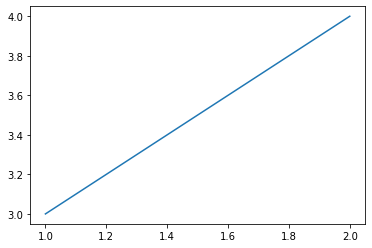

In [2]:
p.plot([1,2],[3,4])
p.show()